In [36]:
import pandas as pd
import numpy as np
import seaborn as sns

### Missing data

Missing data occurs when values are simply absent or contain NaN (not a number) for any feature (column) in a given dataset. This will cause issues with many machine learning algorithms.

**Missing data can negatively impact:**
- Data visualization
- Arithmetic computations
- Machine learning algorithm

**Common methods to deal with missing data:**
- Removee rows or columns containing missing data
- Impute with mean or median
- Impute with mode (most frequently occuring feature)
- Impute with forward or backward fill
- Interpolate data between two points

*Note: Domain knowledge is often needed to decide how to fill nulls.*



In [37]:
df = pd.DataFrame(np.random.randn(10, 4), columns=["A", "B", "C", "D"])
df = df[df > 0]
df

,A,B,C,D
0,NaN,NaN,1.233352,NaN
1,NaN,0.596972,0.624161,0.855245
2,0.424855,NaN,1.252832,1.662506
3,0.808988,0.652664,1.684163,NaN
4,NaN,1.681571,NaN,NaN
5,NaN,NaN,NaN,0.046755
6,NaN,NaN,NaN,1.416562
7,NaN,NaN,0.555727,0.056555
8,1.535054,0.123709,0.494431,0.766405
9,NaN,NaN,0.826489,2.218601


In [38]:
copy = df.copy()
copy.drop(columns="D", inplace=True)
copy

,A,B,C
0,NaN,NaN,1.233352
1,NaN,0.596972,0.624161
2,0.424855,NaN,1.252832
3,0.808988,0.652664,1.684163
4,NaN,1.681571,NaN
5,NaN,NaN,NaN
6,NaN,NaN,NaN
7,NaN,NaN,0.555727
8,1.535054,0.123709,0.494431
9,NaN,NaN,0.826489


### dropna

Remove rows (default), or columns, containing null.

**Parameters:**
- **how** = "any" (default), or "all"
- **thresh** = set number of (non-missing) values a row must contain in order to *not* drop
- **subset** = only looks for NaN in subset of columns (or rows)
- **axis** = "index" (default), or "columns"

In [52]:
copy.dropna(how="all")
copy.dropna(thresh=0)
copy.dropna(subset=["A", "C"])
copy.dropna(axis="columns", subset=2)

,A,C
0,NaN,1.233352
1,NaN,0.624161
2,0.424855,1.252832
3,0.808988,1.684163
4,NaN,NaN
5,NaN,NaN
6,NaN,NaN
7,NaN,0.555727
8,1.535054,0.494431
9,NaN,0.826489


### fillna

Fill missing values.

In [72]:
copy = df.copy()
# copy.fillna(44545) # Fill every NA in DataFrame with value 44545
copy["A"].fillna(copy["A"].median(), inplace=True)
# copy["B"].mode()  # Mainly for categorical data
copy["B"].ffill(inplace=True)
copy["D"].bfill(inplace=True)
copy["C"].interpolate(inplace=True)
copy

,A,B,C,D
0,0.808988,NaN,1.233352,0.855245
1,0.808988,0.596972,0.624161,0.855245
2,0.424855,0.596972,1.252832,1.662506
3,0.808988,0.652664,1.684163,0.046755
4,0.808988,1.681571,1.402054,0.046755
5,0.808988,1.681571,1.119945,0.046755
6,0.808988,1.681571,0.837836,1.416562
7,0.808988,1.681571,0.555727,0.056555
8,1.535054,0.123709,0.494431,0.766405
9,0.808988,0.123709,0.826489,2.218601


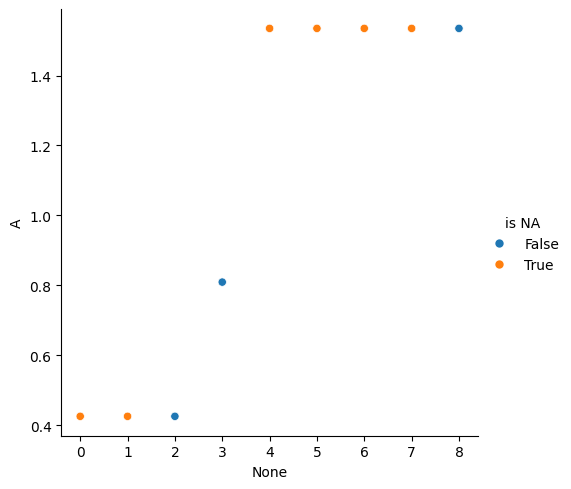

In [80]:
copy = df.copy()
copy["is NA"] = copy["A"].isna()
copy["A"].bfill(inplace=True)
sns.relplot(x=copy.index, y="A", hue="is NA", data=copy)